<a href="https://colab.research.google.com/github/Precillieo/Financial-Model/blob/main/Finance_Model_with_DABL_%26_PYCARET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dabl
!pip install pycaret
import dabl
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

In [2]:
data= pd.read_excel('/content/drive/MyDrive/Mr Olowe/Data Extract for Machine Learning 20201213.xlsx')
test= pd.read_excel('/content/drive/MyDrive/Mr Olowe/Data Extract for Model Performance (Precious) (2) (1).xlsx')
real_test= pd.read_excel('/content/drive/MyDrive/Mr Olowe/Data Extract for Model Performance (Precious) (2) (1).xlsx')

In [3]:
print(data.shape)
print(test.shape)

(2981, 30)
(3449, 28)


In [4]:
minor_test = data[data.status_id == 1]

In [5]:
train = data.loc[data.status_id != 1]

In [6]:
cols_to_drop = ['status', 'amount_due']
train.drop(cols_to_drop, 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
test.drop(['id'], 1, inplace= True)

In [8]:
test_clean = dabl.clean(test, verbose=0)

/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['work_email_validated']
  near_constant.index[near_constant].tolist()))


In [9]:
test_clean.shape

(3449, 26)

In [10]:
train_clean = dabl.clean(train, verbose=0)

/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['work_email_validated']
  near_constant.index[near_constant].tolist()))


In [11]:
train_clean.shape

(1771, 27)

In [12]:
types = dabl.detect_types(train_clean)
types

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
loan_amount,True,False,False,False,False,False,False
interest_due,True,False,False,False,False,False,False
tenor,False,False,False,True,False,False,False
interest_rate,True,False,False,False,False,False,False
status_id,False,False,False,True,False,False,False
card_network,False,False,False,True,False,False,False
card_expiry,True,False,False,False,False,False,False
bank,False,False,False,True,False,False,False
phone_network,False,False,True,False,False,False,False
date_of_birth,False,False,False,False,True,False,False


/usr/local/lib/python3.6/dist-packages/dabl/plot/supervised.py:540: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['work_email_validated']
  near_constant.index[near_constant].tolist()))
/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:630: UserWarning: Dropped 3 outliers in column credit_score.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:630: UserWarning: Dropped 5 outliers in column interest_due.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:630: UserWarning: Dropped 15 outliers in column requested_amount.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:630: UserWarning: Dropped 2 outliers in column loan_amount.
  int(d

Target looks like classification


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Linear Discriminant Analysis training set score: 0.500


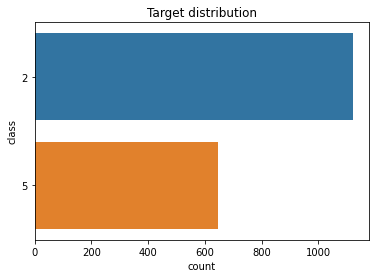

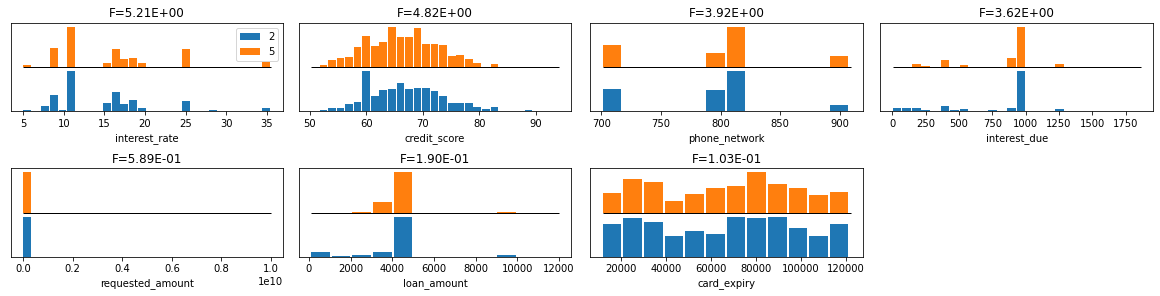

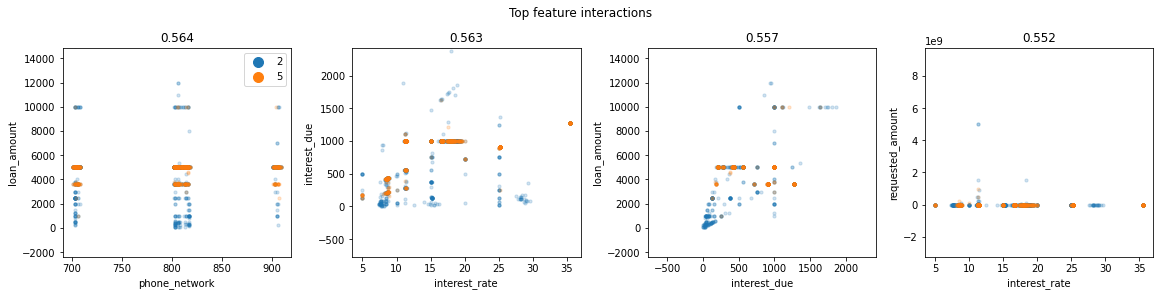

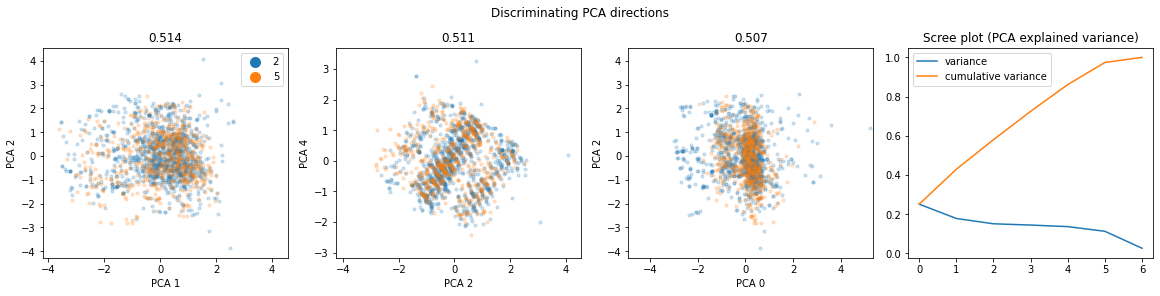

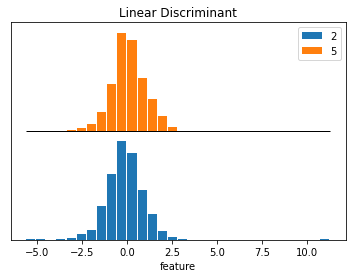

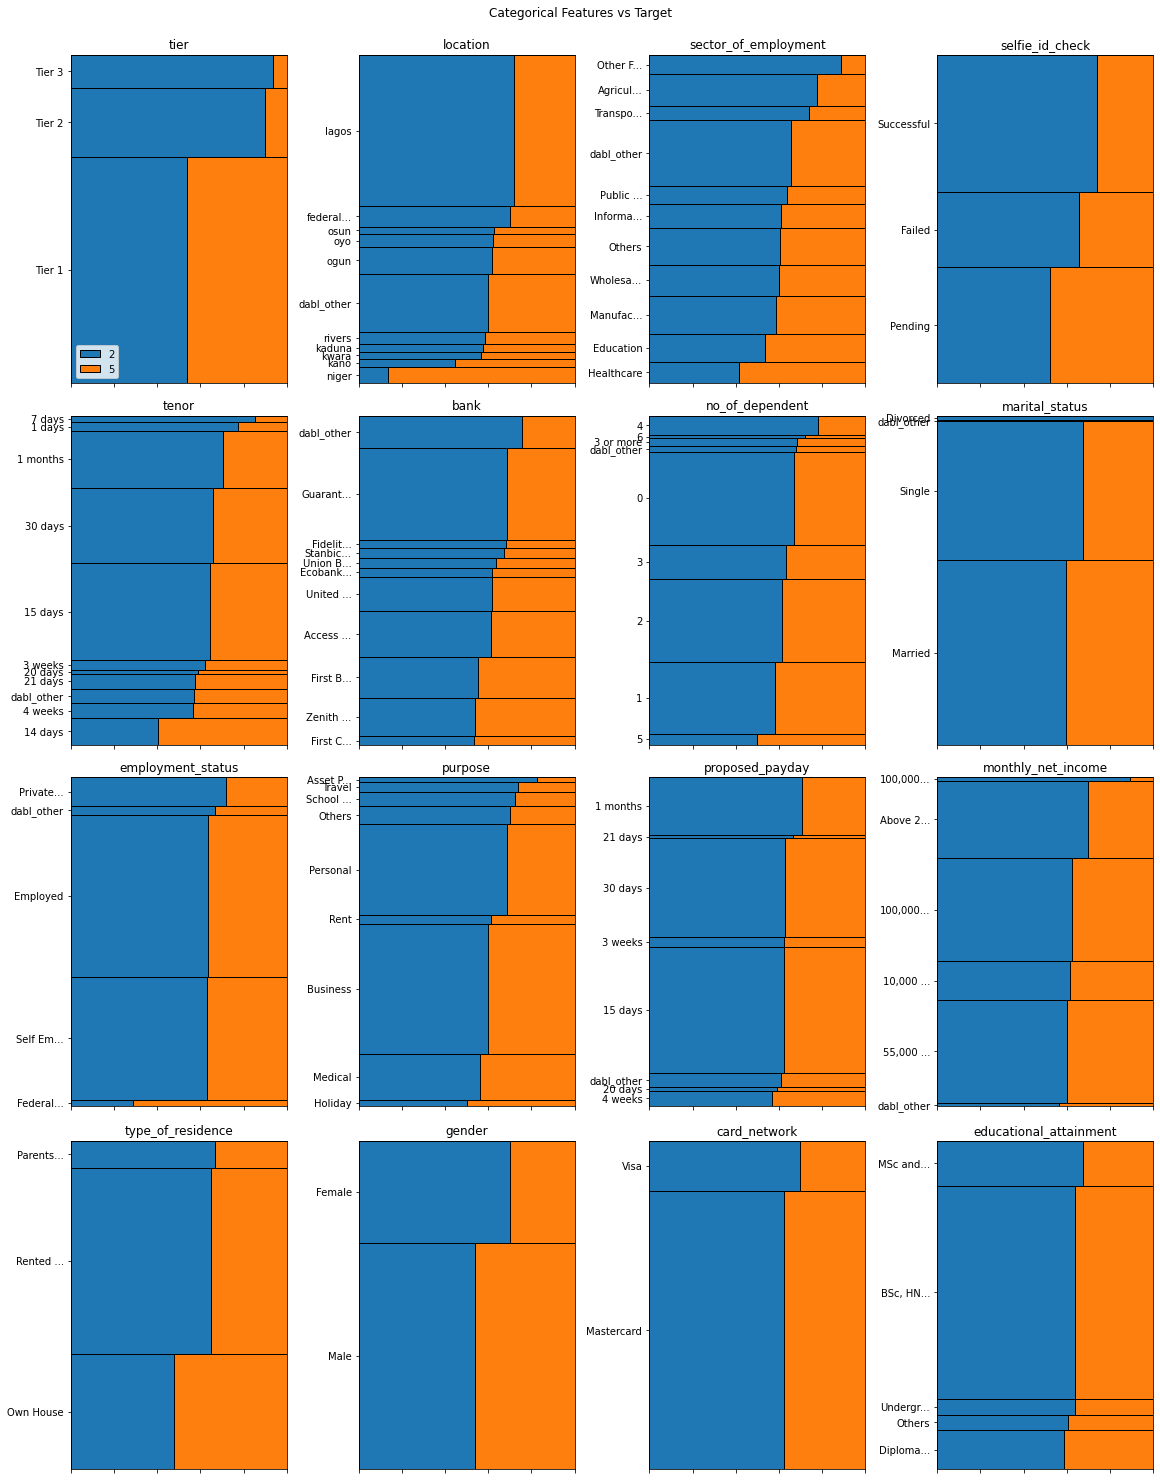

In [13]:
dabl.plot(train, 'status_id')

In [14]:
 #from interpret.glassbox import ExplainableBoostingClassifier

In [15]:
#fc=dabl.SimpleClassifier().fit(train_clean, target_col="status_id")

In [16]:
#from pycaret.classification import *
#expert= setup(data= train, target= 'status_id')
#best_model= compare_models()

In [17]:
#naive= create_model('nb')

In [18]:
#tune_naive= tune_model(naive)

In [19]:
#plot_model(tune_naive, plot= 'auc')

In [20]:
X = train_clean.drop("status_id", axis=1)
y = train_clean.status_id

In [21]:
train_x, val_x, train_y, val_y = train_test_split(X, y, random_state=1)
dab = dabl.SimpleClassifier().fit(train_x, train_y)

Running DummyClassifier(strategy='prior')
accuracy: 0.636 average_precision: 0.364 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.389
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.636 average_precision: 0.364 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.389

Running GaussianNB()
accuracy: 0.443 average_precision: 0.401 roc_auc: 0.568 recall_macro: 0.549 f1_macro: 0.407
=== new best GaussianNB() (using recall_macro):
accuracy: 0.443 average_precision: 0.401 roc_auc: 0.568 recall_macro: 0.549 f1_macro: 0.407

Running MultinomialNB()
accuracy: 0.687 average_precision: 0.620 roc_auc: 0.744 recall_macro: 0.653 f1_macro: 0.655
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.687 average_precision: 0.620 roc_auc: 0.744 recall_macro: 0.653 f1_macro: 0.655

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.590 average_precision: 0.462 roc_auc: 0.663 recall_macro: 0.663 f1_macro: 0.586
=== new best DecisionTreeClas

In [22]:
pred= dab.predict(val_x)

In [23]:
print(classification_report(val_y, pred))

              precision    recall  f1-score   support

           2       0.91      0.41      0.57       280
           5       0.48      0.93      0.63       163

    accuracy                           0.60       443
   macro avg       0.70      0.67      0.60       443
weighted avg       0.75      0.60      0.59       443



In [24]:
test_pred = dab.predict(test_clean)

In [25]:
test_pred

array(['2', '5', '5', ..., '2', '2', '2'], dtype=object)

In [26]:
real_test['predictions'] = test_pred
real_test.predictions = real_test.predictions.map({'2': "SETTLED", '5': "PAST DUE"})
real_test.to_excel("pred.xlsx", index=False)
real_test.head()

,id,loan_amount,interest_due,tenor,interest_rate,card_network,card_expiry,bank,phone_network,date_of_birth,tier,selfie_id_check,gender,marital_status,no_of_dependent,type_of_residence,educational_attainment,employment_status,sector_of_employment,monthly_net_income,work_start_date,work_email_validated,address,requested_amount,purpose,proposed_payday,credit_score,location,predictions
0,6216,32000.0,3452.84,30 days,10.94,Visa,92021.0,United Bank for Africa,703,1973-02-21,Tier 3,Successful,NaN,Married,4,NaN,MSc and Above,Employed,Information Technology,"Above 200,000",2001-01-01,0,NaN,32000.0,Personal,30 days,1.0129,lagos,SETTLED
1,16252,3600.0,719.64,7 days,19.99,Mastercard,82022.0,Guaranty Trust Bank,807,1995-09-10,Tier 1,Pending,Male,Single,0,Rented Apartment,"BSc, HND and Other Equivalent",Private Company,Other Financial,"100,000 - 199,999",2020-07-01,0,Lagos,3600.0,Medical,30 days,1.0000,lagos,PAST DUE
2,16244,10000.0,2520.00,14 days,25.20,Mastercard,112023.0,United Bank for Africa,815,1998-07-16,Tier 1,Failed,Male,Married,0,Own House,MSc and Above,Enterprise,Banking,"Above 200,000",2014-12-24,0,Lagos,10000.0,School Fees,30 days,1.0000,edo,PAST DUE
3,16241,10000.0,2520.00,14 days,25.20,Mastercard,92022.0,Guaranty Trust Bank,706,1997-09-10,Tier 1,Pending,Female,Single,0,Rented Apartment,"BSc, HND and Other Equivalent",Private Company,Other Financial,"100,000 - 199,999",2016-11-16,1,"Gbagada, Lagos",10000.0,Personal,30 days,1.0000,lagos,PAST DUE
4,12689,30000.0,4500.00,7 days,15.00,Mastercard,12022.0,Fidelity Bank,703,1978-01-06,Tier 1,Pending,Male,Divorced,3 or more,Rented Apartment,MSc and Above,Private Company,Other Financial,"Above 200,000",2018-03-19,0,"4 Perez Drive, Off Rock Drive, Lekki Phase, Lagos",5000.0,Personal,15 days,1.0000,lagos,PAST DUE


In [27]:
real_test.predictions.value_counts()

PAST DUE    2419
SETTLED     1030
Name: predictions, dtype: int64